## Traçage des graphes des récompenses pour chaque itération

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import re

def create_graph(path):
# Lire le fichier CSV
    data = pd.read_csv(path)

    # Extraire les valeurs numériques de la colonne 'loss'
    # Utiliser une expression régulière pour extraire le nombre à partir du format tensoriel
    data['loss'] = data['loss'].apply(lambda x: float(re.findall(r"\d+\.\d+", x)[0]) if pd.notnull(x) else None)

    # Tracer la courbe de la perte
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(data['steps_done'], data['loss'], label='Loss')
    plt.xlabel('Steps Done')
    plt.ylabel('Loss')
    plt.title('Loss vs Steps Done')
    plt.legend()

    # Tracer la courbe des récompenses
    plt.subplot(1, 2, 2)
    plt.plot(data['steps_done'], data['total_reward'], label='Total Reward', color='green')
    plt.xlabel('Steps Done')
    plt.ylabel('Total Reward')
    plt.title('Total Reward vs Steps Done')
    plt.legend()

    plt.tight_layout()
    plt.show()
    return

In [46]:
def graph_smoothed(path):
    import matplotlib.pyplot as plt
    import pandas as pd
    import re

    # Lire le fichier CSV
    data = pd.read_csv(path)

    # Extraire les valeurs numériques de la colonne 'loss'
    data['loss'] = data['loss'].apply(lambda x: float(re.findall(r"\d+\.\d+", x)[0]) if pd.notnull(x) else None)

    # Appliquer une moyenne mobile pour lisser les données
    window_size = 50  # Taille de la fenêtre pour la moyenne mobile
    data['smooth_loss'] = data['loss'].rolling(window=window_size).mean()
    data['smooth_reward'] = data['total_reward'].rolling(window=window_size).mean()

    # Tracer la courbe de la perte lissée
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(data['steps_done'], data['smooth_loss'], label='Smoothed Loss')
    plt.xlabel('Steps Done')
    plt.ylabel('Loss')
    plt.title('Smoothed Loss vs Steps Done')
    plt.legend()

    # Tracer la courbe des récompenses lissées
    plt.subplot(1, 2, 2)
    plt.plot(data['steps_done'], data['smooth_reward'], label='Smoothed Total Reward', color='green')
    plt.xlabel('Steps Done')
    plt.ylabel('Total Reward')
    plt.title('Smoothed Total Reward vs Steps Done')
    plt.legend()

    plt.tight_layout()
    plt.show()
    return

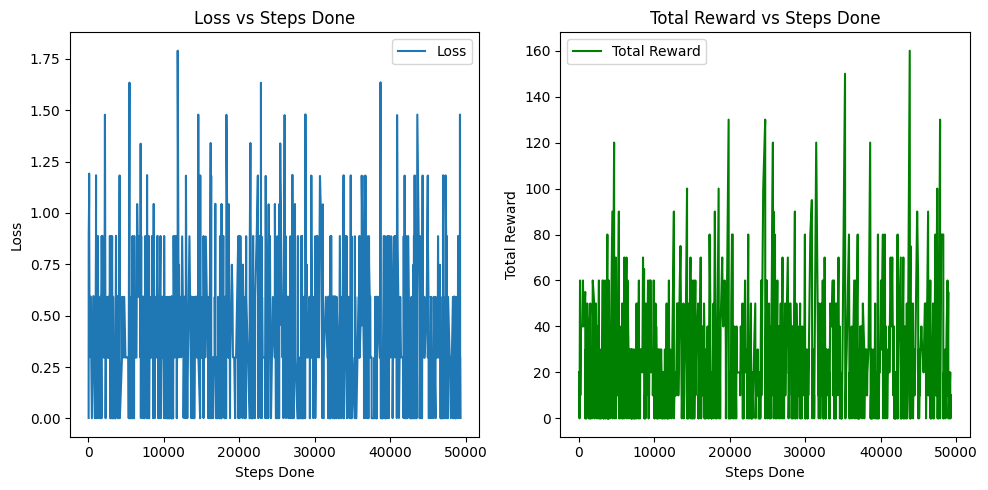

In [7]:
create_graph("training_results1000.csv")

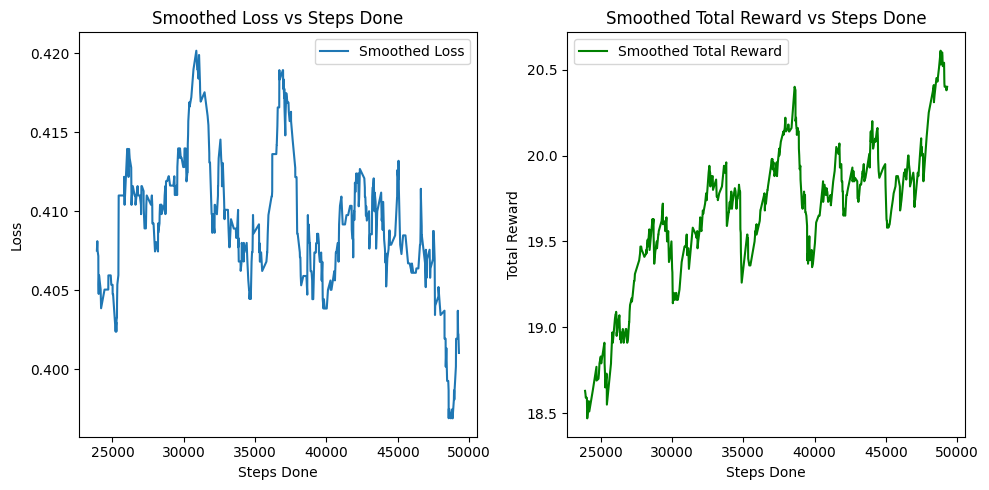

In [14]:
graph_smoothed("training_results1000.csv")

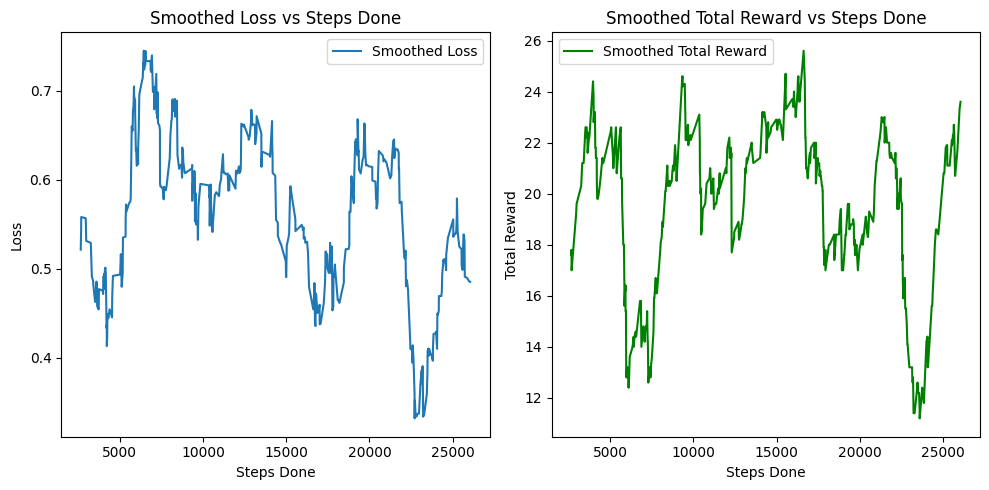

In [3]:
graph_smoothed("training_res_w_reward_change+batch10.csv")

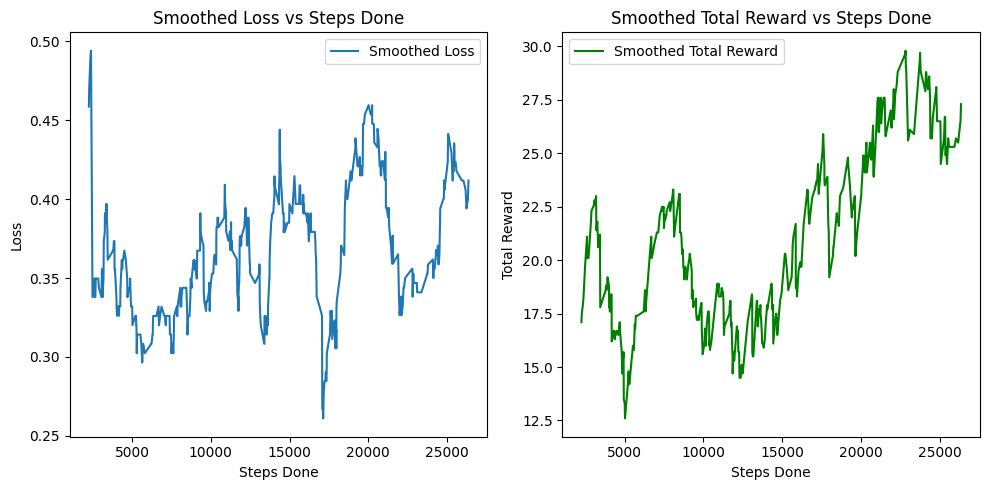

In [21]:
graph_smoothed("training_res_w_reward_change.csv")

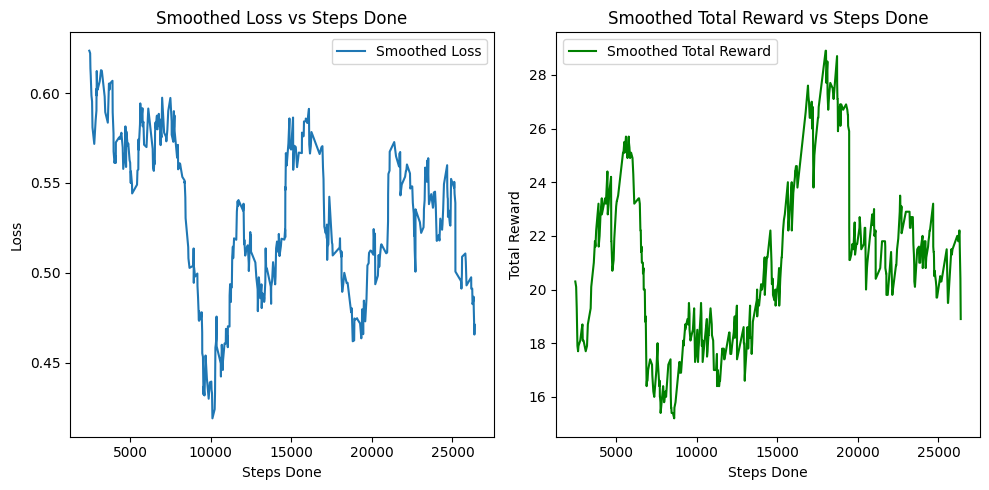

In [4]:
graph_smoothed("custom_reward=0.5.csv")

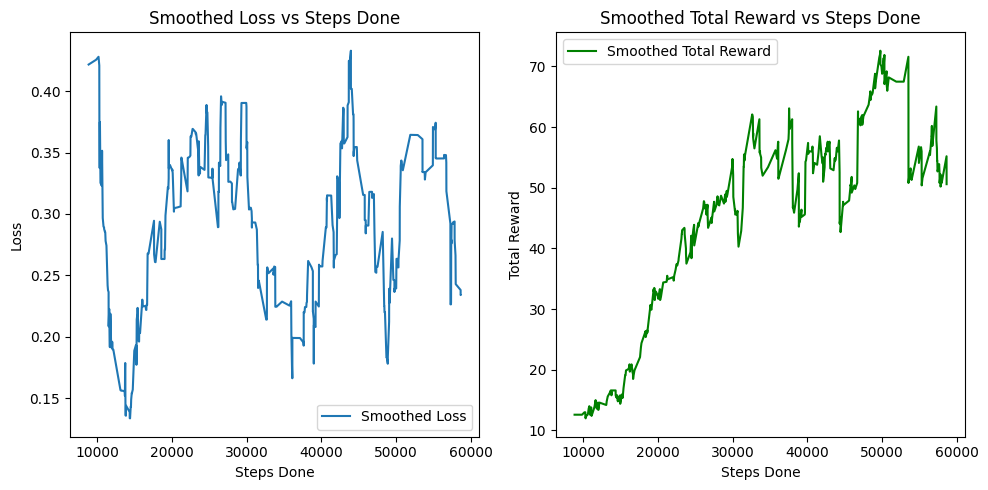

In [44]:
graph_smoothed("eps_decay==10000+remove_clip_reward.csv")

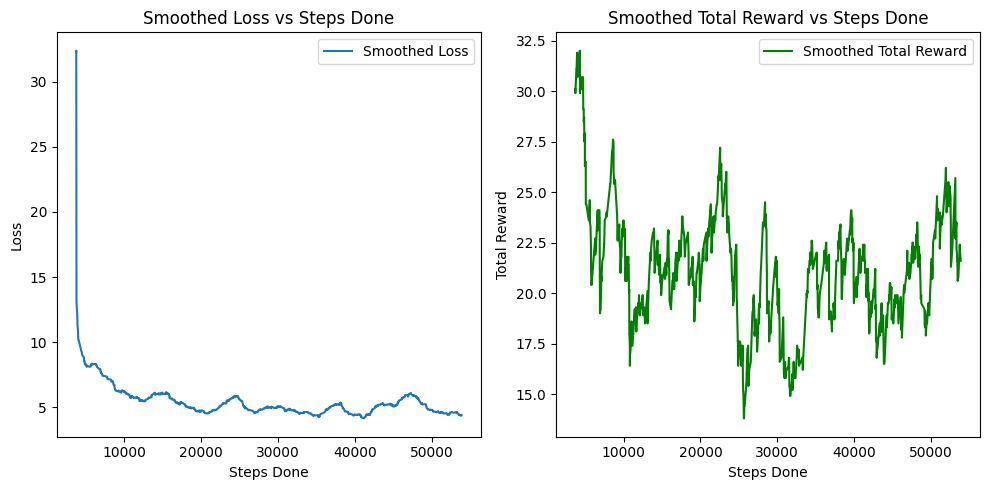

In [47]:
graph_smoothed("results\custom_reward=0.5,lr=1e-2.csv")

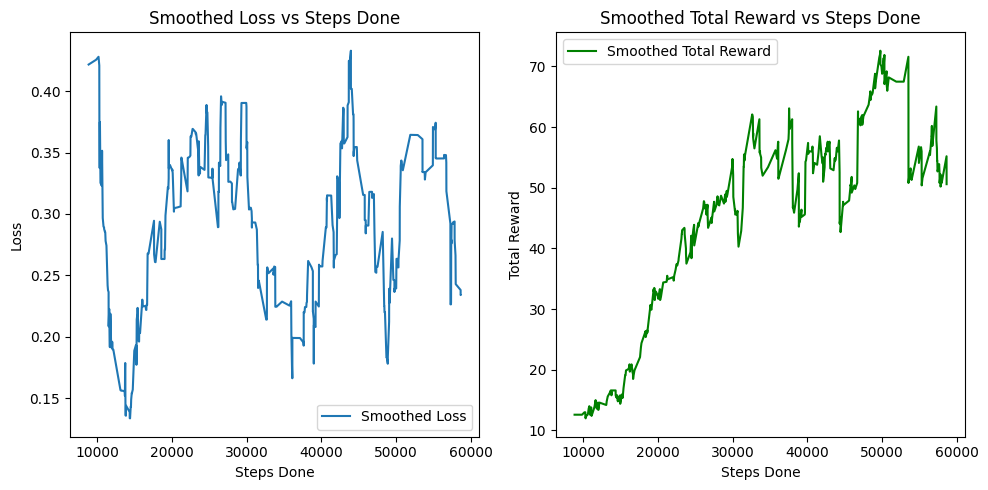

In [31]:
graph_smoothed("eps_decay==10000+remove_clip_reward.csv")

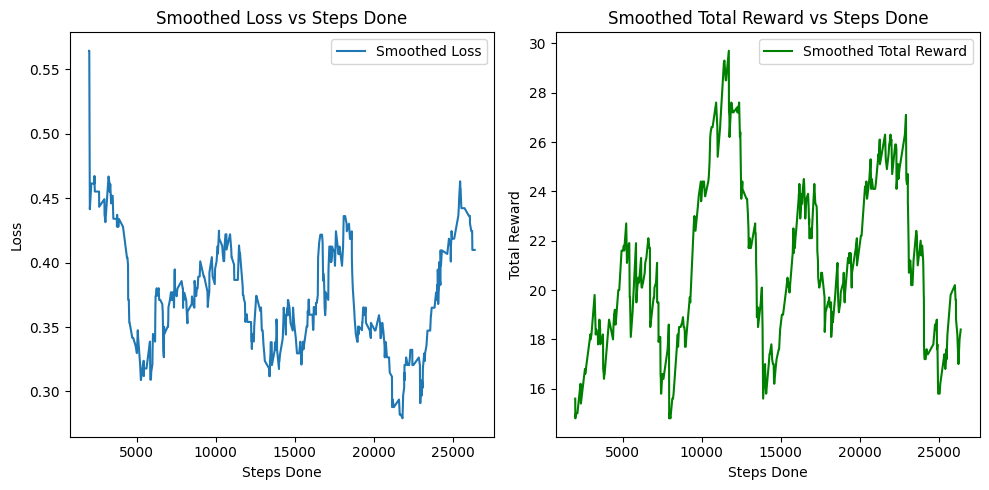

In [42]:
graph_smoothed("training_results_lr_e-2-500.csv")